In [1]:
import pandas as pd
import numpy as np

In [22]:
dataset=pd.read_csv("sms_spam.csv")
dataset

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [24]:
dataset.rename(columns={'type': 'label', 'text': 'message'}, inplace=True)
dataset

,label,message
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5559 non-null   object
 1   message  5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [26]:
dataset.describe()

,label,message
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [27]:
dataset['label']=dataset['label'].map({'ham':0,"spam":1})
dataset

,label,message
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...
...,...,...
5554,0,You are a great role model. You are giving so ...
5555,0,"Awesome, I remember the last time we got someb..."
5556,1,"If you don't, your prize will go to another cu..."
5557,1,"SMS. ac JSco: Energy is high, but u may not kn..."


In [28]:
dataset.describe()

,label
count,5559.000000
mean,0.134377
std,0.341087
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

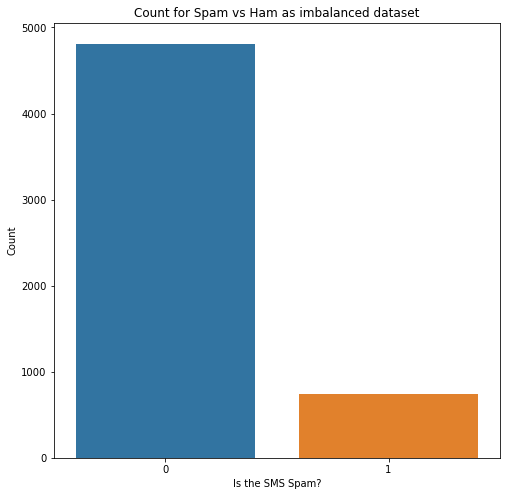

In [30]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title("Count for Spam vs Ham as imbalanced dataset")
p=plt.xlabel("Is the SMS Spam?")
p=plt.ylabel("Count")


In [31]:
only_spam=dataset[dataset['label']==1]
only_spam

,label,message
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...
8,1,Marvel Mobile Play the official Ultimate Spide...
19,1,U can WIN £100 of Music Gift Vouchers every we...
34,1,U have won a nokia 6230 plus a free digital ca...
...,...,...
5532,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
5538,1,HOT LIVE FANTASIES call now 08707509020 Just 2...
5551,1,Ur balance is now £500. Ur next question is: W...
5556,1,"If you don't, your prize will go to another cu..."


In [32]:
dataset.shape

(5559, 2)

In [35]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [36]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
dataset

,label,message
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...
...,...,...
5532,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
5538,1,HOT LIVE FANTASIES call now 08707509020 Just 2...
5551,1,Ur balance is now £500. Ur next question is: W...
5556,1,"If you don't, your prize will go to another cu..."


In [37]:
dataset.reset_index()

,index,label,message
0,0,0,Hope you are having a good week. Just checking in
1,1,0,K..give back my thanks.
2,2,0,Am also doing in cbe only. But have to pay.
3,3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,4,1,okmail: Dear Dave this is your final notice to...
...,...,...,...
9289,5532,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
9290,5538,1,HOT LIVE FANTASIES call now 08707509020 Just 2...
9291,5551,1,Ur balance is now £500. Ur next question is: W...
9292,5556,1,"If you don't, your prize will go to another cu..."


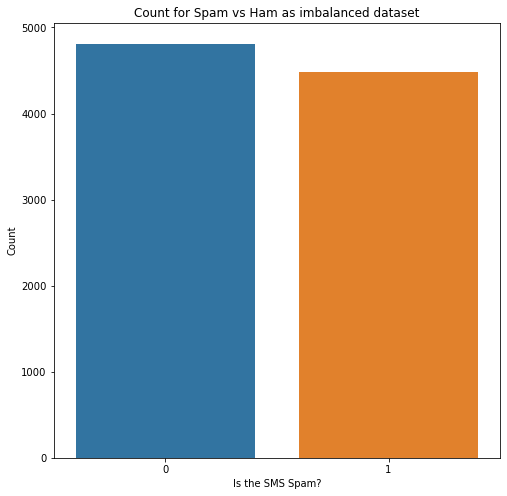

In [38]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='label',data=dataset)
p=plt.title('Count for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [39]:
dataset['word_count']=dataset['message'].apply(lambda x:len(x.split()))

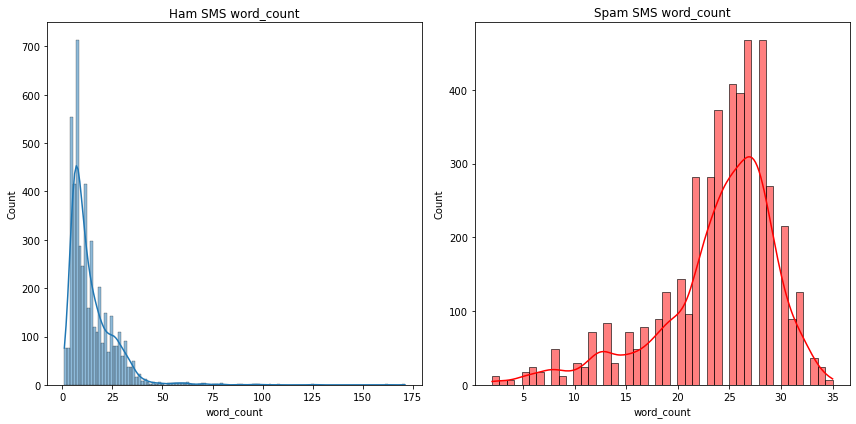

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset['label']==0].word_count,kde=True)
p=plt.title("Ham SMS word_count")
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset['label']==1].word_count,color="red",kde=True)
p=plt.title("Spam SMS word_count")
plt.tight_layout()
plt.show()

In [41]:

def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [42]:

dataset["contains_currency_symbol"]=dataset["message"].apply(currency)

In [43]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,Hope you are having a good week. Just checking in,10,0
1,0,K..give back my thanks.,4,0
2,0,Am also doing in cbe only. But have to pay.,10,0
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",21,1
4,1,okmail: Dear Dave this is your final notice to...,27,0
...,...,...,...,...
5532,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,26,1
5538,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,24,0
5551,1,Ur balance is now £500. Ur next question is: W...,26,1
5556,1,"If you don't, your prize will go to another cu...",27,0


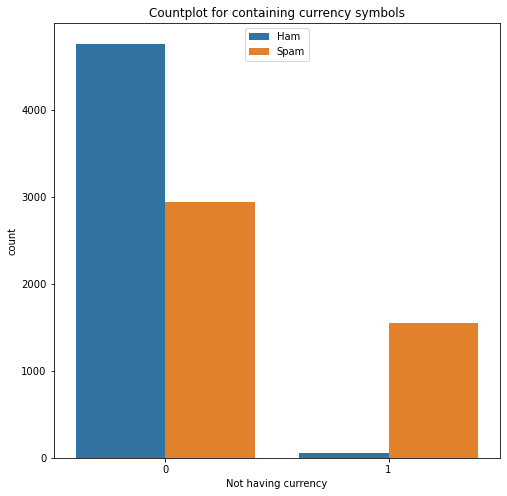

In [46]:
plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_currency_symbol",data=dataset,hue="label")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing currency symbols")
p=plt.xlabel("Not having currency")
p=plt.ylabel("count")

In [47]:

def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [48]:

dataset["contains_number"]=dataset["message"].apply(number)

In [49]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,Hope you are having a good week. Just checking in,10,0,0
1,0,K..give back my thanks.,4,0,0
2,0,Am also doing in cbe only. But have to pay.,10,0,0
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",21,1,1
4,1,okmail: Dear Dave this is your final notice to...,27,0,1
...,...,...,...,...,...
5532,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,26,1,1
5538,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,24,0,1
5551,1,Ur balance is now £500. Ur next question is: W...,26,1,1
5556,1,"If you don't, your prize will go to another cu...",27,0,1


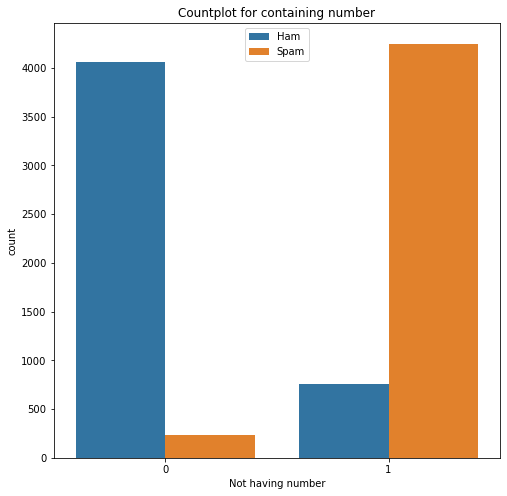

In [50]:

plt.figure(figsize=(8,8))
p=sns.countplot(x="contains_number",data=dataset,hue="label")
p=plt.legend(labels=["Ham","Spam"],loc=9)
p=plt.title("Countplot for containing number")
p=plt.xlabel("Not having number")
p=plt.ylabel("count")

In [51]:

#data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exam2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\exam2\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\exam2\AppData\Roaming\nltk_data...


In [52]:

corpus=[]
wnl=WordNetLemmatizer()
for sms in list(dataset.message):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    corpus.append(message)

In [53]:
corpus

['hope good week checking',
 'k give back thanks',
 'also cbe pay',
 'complimentary star ibiza holiday cash need urgent collection landline lose box sk wp ppm',
 'okmail dear dave final notice collect tenerife holiday cash award call landline tc sae box cw wx ppm',
 'aiya discus later lar pick u',
 'much buzy',
 'please ask mummy call father',
 'marvel mobile play official ultimate spider man game ur mobile right text spider game send u free ball wallpaper',
 'fyi usf swing room whenever',
 'sure thing big man hockey election go longer hour though',
 'anything lor',
 'march ending ready call sure problem capital never complete far work lady',
 'hmm well night night',
 'k sure get noon see',
 'ha ha cool cool chikku chikku db',
 'darren saying dat u meeting da ge den dun meet dinner co later u leave xy feel awkward den u meet lunch lor',
 'dint tell anything angry told abi',
 'u u wan come come lor din c stripe skirt',
 'u win music gift voucher every week starting txt word draw tscs ww

In [56]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

In [57]:

x=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [58]:
x

,ac,access,account,address,admirer,age,already,also,always,an,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9289,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9290,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9291,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9292,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y

0       0
1       0
2       0
3       1
4       1
       ..
5532    1
5538    1
5551    1
5556    1
5557    1
Name: label, Length: 9294, dtype: int64

In [60]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#naive bayes model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
cv = cross_val_score(mnb, x, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.939
0.005


In [62]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

In [63]:
y_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [64]:
y_test

5521    1
1112    0
653     1
4058    0
3733    0
       ..
4004    0
4467    0
4027    1
5441    0
922     1
Name: label, Length: 1859, dtype: int64

In [65]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       939
           1       0.95      0.93      0.94       920

    accuracy                           0.94      1859
   macro avg       0.94      0.94      0.94      1859
weighted avg       0.94      0.94      0.94      1859



In [66]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[891,  48],
       [ 62, 858]], dtype=int64)

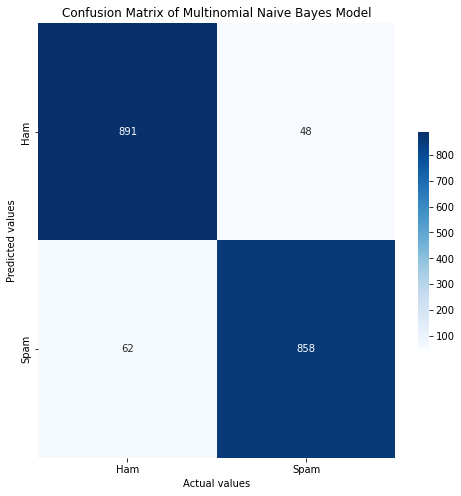

In [67]:
plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv1=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.006


In [69]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       939
           1       0.95      0.93      0.94       920

    accuracy                           0.94      1859
   macro avg       0.94      0.94      0.94      1859
weighted avg       0.94      0.94      0.94      1859



In [72]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[900,  39],
       [  2, 918]], dtype=int64)

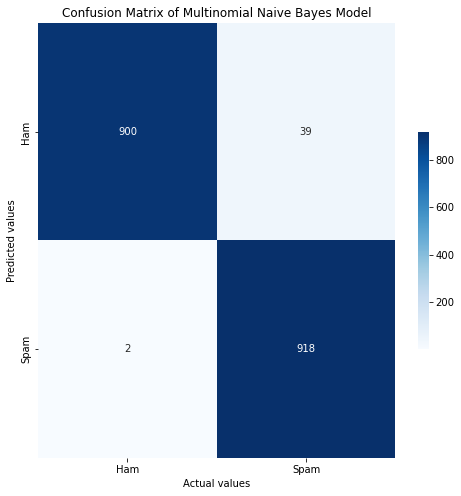

In [73]:

plt.figure(figsize=(8, 8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, annot=True, fmt='g', cbar_kws={"shrink": 0.5}, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
plt.show()

In [74]:
def predict_spam(sms):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms)
    message=message.lower()
    words=message.split()
    filtered_words=[word for word in words if word not in set(stopwords.words("english"))]
    lemm_words=[wnl.lemmatize(word) for word in filtered_words]
    message=' '.join(lemm_words)
    temp=tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [92]:
#prediction 
sample="complimentary 4 STAR Ibiza your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
if predict_spam(sample):
    print("This is a Spam Message")
else:
    print("This is not Spam")

This is a Spam Message


array(['complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+'],
      dtype=object)